# Introduction

# Importing required libraries

In [4]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
import dask.dataframe as dd
import glob

# Check and review each csv

In [5]:
def eval_df(dataframe):
    # Display basic info
    print("\n DATA TYPES & MISSING VALUES")
    print(dataframe.info())

    # Check for missing values
    missing_values = dataframe.isnull().sum()
    print("\n MISSING VALUES PER COLUMN")
    print(missing_values[missing_values>0])

    # Check for duplicate rows
    duplicates = dataframe.duplicated().sum()
    print(f"\n DUPLICATE ROWS FOUND: {duplicates}")

    # Display basic statistics
    print("\n SUMMARY STATISTICS")
    print(dataframe.describe(include="all"))

## Country stat

In [6]:
# Start the dataframe with the a list of country and country code
country_stat = pd.read_csv("data/country_codes.csv")
country_stat.head()

,Country,Code
0,Afghanistan,AFG
1,Aland Islands,ALA
2,Albania,ALB
3,Algeria,DZA
4,American Samoa,ASM


In [7]:
folder_path = 'data/country_stat/'
csv_files = glob.glob(folder_path + "*.csv")

for file in csv_files:
    df = pd.read_csv(file)
    df.drop(columns=["Country"], inplace=True)
    country_stat = pd.merge(country_stat, df, on = "Code", how = "outer")

eval_df(country_stat)


 DATA TYPES & MISSING VALUES
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257 entries, 0 to 256
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Country                      251 non-null    object 
 1   Code                         252 non-null    object 
 2   urban_population             197 non-null    float64
 3   corruption_perception_index  180 non-null    float64
 4   gdp_per_capita               164 non-null    float64
 5   land_boundaries              246 non-null    float64
 6   coastline                    244 non-null    float64
 7   num_border_countries         244 non-null    float64
 8   border_countries             162 non-null    object 
 9   hospital_beds_per_1000       160 non-null    float64
 10  unemployment                 187 non-null    float64
 11  political_regime             174 non-null    object 
 12  gini_index                   147 non-null    flo

In [8]:
country_stat.query("Country.isna() or Country == ''")

,Country,Code,urban_population,corruption_perception_index,gdp_per_capita,land_boundaries,coastline,num_border_countries,border_countries,hospital_beds_per_1000,unemployment,political_regime,gini_index,population_density,poverty,median_age,land_area_sqkm
42,NaN,CHI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.408,NaN,NaN,NaN,NaN,NaN,NaN
252,NaN,NaN,NaN,NaN,NaN,156.0,83.8,1.0,Cyprus 156 km,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
253,NaN,NaN,NaN,NaN,NaN,0.0,74.1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
254,NaN,NaN,NaN,NaN,NaN,0.0,11.1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
255,NaN,NaN,NaN,NaN,NaN,0.0,124.1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
256,NaN,NaN,NaN,NaN,NaN,0.0,518.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
country_stat = country_stat[~(country_stat['Country'].isna() | (country_stat['Country']==''))]
eval_df(country_stat)


 DATA TYPES & MISSING VALUES
<class 'pandas.core.frame.DataFrame'>
Index: 251 entries, 0 to 251
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Country                      251 non-null    object 
 1   Code                         251 non-null    object 
 2   urban_population             197 non-null    float64
 3   corruption_perception_index  180 non-null    float64
 4   gdp_per_capita               164 non-null    float64
 5   land_boundaries              241 non-null    float64
 6   coastline                    239 non-null    float64
 7   num_border_countries         239 non-null    float64
 8   border_countries             161 non-null    object 
 9   hospital_beds_per_1000       160 non-null    float64
 10  unemployment                 186 non-null    float64
 11  political_regime             174 non-null    object 
 12  gini_index                   147 non-null    float64


In [10]:
missing_df = country_stat.copy()
# since there are island countries that are islands and has no border countries I dropped the border countries for now, to narrow down the geographic data I would just use land_boundaries
missing_df.drop(columns=['border_countries','coastline', 'num_border_countries'], inplace=True)
missing_df['missing_count'] = missing_df.isna().sum(axis=1)
missing_df = missing_df[missing_df['missing_count']>0].sort_values(by='missing_count', ascending=False)
missing_df.style.set_table_attributes('style="height:300px; overflow-y:scroll; display:block;"')

,Country,Code,urban_population,corruption_perception_index,gdp_per_capita,land_boundaries,hospital_beds_per_1000,unemployment,political_regime,gini_index,population_density,poverty,median_age,land_area_sqkm,missing_count
4,Aland Islands,ALA,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,12
20,"Bonaire, Sint Eustatius and Saba",BES,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,12
159,Mayotte,MYT,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,12
188,Reunion,REU,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,12
86,Guadeloupe,GLP,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,12
155,Martinique,MTQ,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,12
247,Turkish Rep N Cyprus (temporary code),XTX,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,12
27,Saint Barthélemy,BLM,nan,nan,nan,0.000000,nan,nan,nan,nan,nan,nan,nan,nan,11
11,Antarctica,ATA,nan,nan,nan,0.000000,nan,nan,nan,nan,nan,nan,nan,nan,11
12,French Southern Territories,ATF,nan,nan,nan,0.000000,nan,nan,nan,nan,nan,nan,nan,nan,11


In [11]:
eval_df(missing_df)


 DATA TYPES & MISSING VALUES
<class 'pandas.core.frame.DataFrame'>
Index: 141 entries, 4 to 250
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Country                      141 non-null    object 
 1   Code                         141 non-null    object 
 2   urban_population             87 non-null     float64
 3   corruption_perception_index  70 non-null     float64
 4   gdp_per_capita               54 non-null     float64
 5   land_boundaries              131 non-null    float64
 6   hospital_beds_per_1000       50 non-null     float64
 7   unemployment                 76 non-null     float64
 8   political_regime             64 non-null     object 
 9   gini_index                   37 non-null     float64
 10  population_density           90 non-null     float64
 11  poverty                      37 non-null     float64
 12  median_age                   91 non-null     float64


I would be conservative and would just only remove all countries that only has one variable

In [12]:
missing_df = missing_df[missing_df['missing_count']>=11].sort_values(by='missing_count', ascending=False)
missing_df

,Country,Code,urban_population,corruption_perception_index,gdp_per_capita,land_boundaries,hospital_beds_per_1000,unemployment,political_regime,gini_index,population_density,poverty,median_age,land_area_sqkm,missing_count
4,Aland Islands,ALA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12
20,"Bonaire, Sint Eustatius and Saba",BES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12
159,Mayotte,MYT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12
188,Reunion,REU,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12
86,Guadeloupe,GLP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12
155,Martinique,MTQ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12
247,Turkish Rep N Cyprus (temporary code),XTX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12
27,Saint Barthélemy,BLM,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11
11,Antarctica,ATA,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11
12,French Southern Territories,ATF,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11


In [13]:
country_stat = country_stat[~country_stat['Code'].isin(missing_df['Code'])]
eval_df(country_stat)


 DATA TYPES & MISSING VALUES
<class 'pandas.core.frame.DataFrame'>
Index: 208 entries, 1 to 251
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Country                      208 non-null    object 
 1   Code                         208 non-null    object 
 2   urban_population             197 non-null    float64
 3   corruption_perception_index  180 non-null    float64
 4   gdp_per_capita               164 non-null    float64
 5   land_boundaries              205 non-null    float64
 6   coastline                    205 non-null    float64
 7   num_border_countries         205 non-null    float64
 8   border_countries             158 non-null    object 
 9   hospital_beds_per_1000       160 non-null    float64
 10  unemployment                 186 non-null    float64
 11  political_regime             174 non-null    object 
 12  gini_index                   147 non-null    float64


## National Policy

In [22]:
national_policy = pd.read_csv('data/national_policy.csv')
national_policy.head()

,Code,Country,area_effect,log_type,measure,COMMENTS,implementation_date
0,AFG,Afghanistan,national,induction,Awareness campaigns,MoPH begins announcements on their facebook to...,1/24/2020
1,AFG,Afghanistan,national,induction,Health screenings in airports and border cross...,Health teams at airports will check passengers...,1/26/2020
2,AFG,Afghanistan,national,induction,Health screenings in airports and border cross...,Health screenings of all passengers at airports.,1/27/2020
3,AFG,Afghanistan,national,induction,International flights suspension,Flights to China are suspended.,1/27/2020
4,AFG,Afghanistan,national,induction,Border checks,All China and Iran nationals,2/1/2020


In [23]:
national_policy.describe()

,Code,Country,area_effect,log_type,measure,COMMENTS,implementation_date
count,23923,23923,23923,23923,23923,23799,23636
unique,193,193,2,2,35,23281,359
top,GBR,United Kingdom,national,induction,Economic measures,APEC economies agree to keep markets open and ...,3/16/2020
freq,655,655,20256,19445,2980,19,342


In [24]:
sorted(national_policy['measure'].unique())

['Additional health/documents requirements upon arrival',
 'Amendments to funeral and burial regulations',
 'Awareness campaigns',
 'Border checks',
 'Border closure',
 'Changes in prison-related policies',
 'Checkpoints within the country',
 'Closure of businesses and public services',
 'Complete border closure',
 'Curfews',
 'Domestic travel restrictions',
 'Economic measures',
 'Emergency administrative structures activated or established',
 'Full lockdown',
 'General recommendations',
 'Health screenings in airports and border crossings',
 'Humanitarian exemptions',
 'International flights suspension',
 'Isolation and quarantine policies',
 'Limit product imports/exports',
 'Limit public gatherings',
 'Lockdown of refugee/idp camps or other minorities',
 'Mass population testing',
 'Military deployment',
 'Obligatory medical tests not related to COVID-19',
 'Other public health measures enforced',
 'Partial lockdown',
 'Psychological assistance and medical social work',
 'Requireme

There are around 36 measures that the government made. I would focus on the measures that would directly affect population mobility

In [25]:
measures_to_focus = ['Additional health/documents requirements upon arrival',
                     'Border checks',
                     'Border closure',
                     'Checkpoints within the country',
                     'Closure of business and public services',
                     'Complete border closure',
                     'Curfews',
                     'Domestic travel restrictions',
                     'Full lockdown',
                     'Health screenings in airports and border crossings',
                     'Humanitarian exemptions',
                     'International flights suspension',
                     'Isolation and quarantine policies',
                     'Limit public gatherings',
                     'Lockdown of refugee/idp camps or other minorities',
                     'Partial lockdown',
                     'School closure']

In [26]:
# select the measures to focus
national_policy = national_policy[national_policy['measure'].isin(measures_to_focus)]

In [27]:
# create a column that is a the mix between area_of effect
national_policy['measure_type'] = national_policy['area_effect']+"_"+national_policy['log_type']
# drop area_effect, log_type, and comments
national_policy.drop(columns=['area_effect', 'log_type', 'COMMENTS'], inplace=True)
# get unique measure per day
national_policy.drop_duplicates(inplace=True)

In [30]:
# make the measure_type into a datetime
national_policy['implementation_date'] = pd.to_datetime(national_policy['implementation_date'], errors='coerce')
# aggregate measure_type and measure by date and country
national_policy = national_policy.groupby(['Code','Country','implementation_date']).apply(lambda g: g.groupby('measure_type')['measure'].unique().apply(list).to_dict()).reset_index(name='measure_dict')
national_policy

/tmp/ipykernel_480/2220675760.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  national_policy = national_policy.groupby(['Code','Country','implementation_date']).apply(lambda g: g.groupby('measure_type')['measure'].unique().apply(list).to_dict()).reset_index(name='measure_dict')


,Code,Country,implementation_date,measure_dict
0,AFG,Afghanistan,2020-01-26,{'national_induction': ['Health screenings in ...
1,AFG,Afghanistan,2020-01-27,{'national_induction': ['Health screenings in ...
2,AFG,Afghanistan,2020-02-01,{'national_induction': ['Border checks']}
3,AFG,Afghanistan,2020-02-02,{'national_induction': ['Isolation and quarant...
4,AFG,Afghanistan,2020-02-12,{'local_induction': ['Isolation and quarantine...
...,...,...,...,...
4942,ZWE,Zimbabwe,2020-05-04,{'national_induction': ['Partial lockdown']}
4943,ZWE,Zimbabwe,2020-05-05,{'national_phaseout': ['Limit public gathering...
4944,ZWE,Zimbabwe,2020-05-17,"{'national_induction': ['Partial lockdown'], '..."
4945,ZWE,Zimbabwe,2020-05-21,{'national_phaseout': ['Limit public gathering...


In [31]:
national_policy['national_induction_num'] = national_policy['measure_dict'].apply(lambda x: len(x.get('national_induction')) if x.get('national_induction') is not None else 0)
national_policy['national_phaseout_num'] = national_policy['measure_dict'].apply(lambda x: len(x.get('national_phaseout_num')) if x.get('national_phaseout_num') is not None else 0)
national_policy['local_induction_num'] = national_policy['measure_dict'].apply(lambda x: len(x.get('local_induction')) if x.get('local_induction') is not None else 0)
national_policy['local_phaseout_num'] = national_policy['measure_dict'].apply(lambda x: len(x.get('local_phaseout_num')) if x.get('local_phaseout_num') is not None else 0)
national_policy

,Code,Country,implementation_date,measure_dict,national_induction_num,national_phaseout_num,local_induction_num,local_phaseout_num
0,AFG,Afghanistan,2020-01-26,{'national_induction': ['Health screenings in ...,1,0,0,0
1,AFG,Afghanistan,2020-01-27,{'national_induction': ['Health screenings in ...,2,0,0,0
2,AFG,Afghanistan,2020-02-01,{'national_induction': ['Border checks']},1,0,0,0
3,AFG,Afghanistan,2020-02-02,{'national_induction': ['Isolation and quarant...,1,0,0,0
4,AFG,Afghanistan,2020-02-12,{'local_induction': ['Isolation and quarantine...,1,0,1,0
...,...,...,...,...,...,...,...,...
4942,ZWE,Zimbabwe,2020-05-04,{'national_induction': ['Partial lockdown']},1,0,0,0
4943,ZWE,Zimbabwe,2020-05-05,{'national_phaseout': ['Limit public gathering...,0,0,0,0
4944,ZWE,Zimbabwe,2020-05-17,"{'national_induction': ['Partial lockdown'], '...",1,0,0,0
4945,ZWE,Zimbabwe,2020-05-21,{'national_phaseout': ['Limit public gathering...,0,0,0,0


## Mobility data

In [32]:
# load csv with selected columns excluded
excluded_cols =['iso_3166_2_code', 'census_flips_code', 'place_id']
all_cols = dd.read_csv('data/global_mobility_report.csv', sample=10000).columns.tolist()
usecols = [col for col in all_cols if col not in excluded_cols]

mobility_data = dd.read_csv('data/global_mobility_report.csv', usecols=usecols, assume_missing = True)

# Filter rows that have entry for sub_region_1, sub_region_2, metro_area
# Filter date up until 2021-01-31

#mobility_data['date'] = dd.to_datetime(mobility_data['date'], errors='coerce')
#mobility_data = mobility_data[mobility_data[['sub_region_1', 'sub_region_2', 'metro_area']].isnull().all(axis=1) &
 #                             (mobility_data['date']<='2021-01-31')]

In [33]:
# Columns to include
usecols = [
    "country_region_code", "country_region", "sub_region_1", "sub_region_2", "metro_area",
    "date", "retail_and_recreation_percent_change_from_baseline",
    "grocery_and_pharmacy_percent_change_from_baseline",
    "parks_percent_change_from_baseline",
    "transit_stations_percent_change_from_baseline",
    "workplaces_percent_change_from_baseline",
    "residential_percent_change_from_baseline"
]

# Explicit dtypes for columns Dask struggles with
dtype_fix = {
    'sub_region_1': 'object',
    'sub_region_2': 'object',
    'metro_area': 'object'
}

# Load the data
df = dd.read_csv(
    'data/global_mobility_report.csv',
    usecols=usecols,
    dtype=dtype_fix,
    parse_dates=['date'],
    assume_missing=True
)

# Filter rows
missing_cols = [
    'sub_region_1',
    'sub_region_2',
    'metro_area'
]

filtered = df[
    df[missing_cols].isnull().all(axis=1) &
    (df['date'] <= '2021-01-31')
]

# Preview safely
print(filtered.head(10))

  country_region_code        country_region sub_region_1 sub_region_2  \
0                  AE  United Arab Emirates         <NA>         <NA>   
1                  AE  United Arab Emirates         <NA>         <NA>   
2                  AE  United Arab Emirates         <NA>         <NA>   
3                  AE  United Arab Emirates         <NA>         <NA>   
4                  AE  United Arab Emirates         <NA>         <NA>   
5                  AE  United Arab Emirates         <NA>         <NA>   
6                  AE  United Arab Emirates         <NA>         <NA>   
7                  AE  United Arab Emirates         <NA>         <NA>   
8                  AE  United Arab Emirates         <NA>         <NA>   
9                  AE  United Arab Emirates         <NA>         <NA>   

  metro_area       date  retail_and_recreation_percent_change_from_baseline  \
0       <NA> 2020-02-15                                                0.0    
1       <NA> 2020-02-16               

In [34]:
filtered['date'].max().compute()

Timestamp('2021-01-31 00:00:00')

In [35]:
filtered.sample(frac=0.005, random_state=1).compute()

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
13905,AO,Angola,<NA>,<NA>,<NA>,2021-01-12,-6.0,0.0,28.0,-3.0,-9.0,4.0
7957,AF,Afghanistan,<NA>,<NA>,<NA>,2020-09-19,35.0,21.0,15.0,-11.0,1.0,1.0
333,AE,United Arab Emirates,<NA>,<NA>,<NA>,2021-01-13,-18.0,-1.0,-31.0,-34.0,-20.0,7.0
429500,AT,Austria,<NA>,<NA>,<NA>,2020-09-08,2.0,-5.0,112.0,-13.0,-28.0,1.0
18117,AR,Argentina,<NA>,<NA>,<NA>,2020-06-24,-62.0,-21.0,-83.0,-53.0,-27.0,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...
493706,YE,Yemen,<NA>,<NA>,<NA>,2020-05-04,-14.0,-9.0,-17.0,-20.0,-14.0,5.0
506376,ZW,Zimbabwe,<NA>,<NA>,<NA>,2020-05-12,-35.0,-26.0,-30.0,-53.0,-31.0,29.0
410222,UY,Uruguay,<NA>,<NA>,<NA>,2020-07-12,-37.0,-13.0,-66.0,-42.0,-8.0,11.0
431494,VN,Vietnam,<NA>,<NA>,<NA>,2020-08-08,-20.0,2.0,-25.0,-21.0,-8.0,10.0


In [36]:
filtered.columns

Index(['country_region_code', 'country_region', 'sub_region_1', 'sub_region_2',
       'metro_area', 'date',
       'retail_and_recreation_percent_change_from_baseline',
       'grocery_and_pharmacy_percent_change_from_baseline',
       'parks_percent_change_from_baseline',
       'transit_stations_percent_change_from_baseline',
       'workplaces_percent_change_from_baseline',
       'residential_percent_change_from_baseline'],
      dtype='object')

In [37]:
filtered = filtered.drop(columns=['sub_region_1', 'sub_region_2', 'metro_area'])
sorted(filtered['country_region'].dropna().unique().compute())

['Afghanistan',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Aruba',
 'Australia',
 'Austria',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Bulgaria',
 'Burkina Faso',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Chile',
 'Colombia',
 'Costa Rica',
 'Croatia',
 'Czechia',
 "Côte d'Ivoire",
 'Denmark',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Estonia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Guatemala',
 'Guinea-Bissau',
 'Haiti',
 'Honduras',
 'Hong Kong',
 'Hungary',
 'India',
 'Indonesia',
 'Iraq',
 'Ireland',
 'Israel',
 'Italy',
 'Jamaica',
 'Japan',
 'Jordan',
 'Kazakhstan',
 'Kenya',
 'Kuwait',
 'Kyrgyzstan',
 'Laos',
 'Latvia',
 'Lebanon',
 'Libya',
 'Liechtenstein',
 'Lithuania',
 'Luxembourg',
 'Malaysia',
 'Mali',
 'Malta',
 'Mauritius',
 'Mexico',
 'Moldova',
 'Mongolia',
 'Morocco',
 'M

In [40]:
countries = national_policy.groupby(['Country','Code'])['measure_dict'].count().reset_index()

In [41]:
countries

,Country,Code,measure_dict
0,Afghanistan,AFG,15
1,Albania,ALB,21
2,Algeria,DZA,35
3,Angola,AGO,36
4,Antigua and Barbuda,ATG,22
...,...,...,...
188,Venezuela,VEN,25
189,Vietnam,VNM,30
190,Yemen,YEM,17
191,Zambia,ZMB,5


In [42]:
country_in_mob = filtered['country_region'].unique().compute()

In [43]:
len(country_in_mob)

135

In [44]:
len(np.intersect1d(country_in_mob, countries['Country']))

130

In [45]:
country_in_both = np.intersect1d(country_in_mob, countries['Country'])

In [46]:
sorted(country_in_mob[~country_in_mob.isin(country_in_both)])

['Aruba', "Côte d'Ivoire", 'Puerto Rico', 'Réunion', 'Taiwan']

In [47]:
for x in sorted(countries['Country']):
    print(x)

Afghanistan
Albania
Algeria
Angola
Antigua and Barbuda
Argentina
Armenia
Australia
Austria
Azerbaijan
Bahrain
Bangladesh
Barbados
Belarus
Belgium
Belize
Benin
Bhutan
Bolivia
Bosnia and Herzegovina
Botswana
Brazil
Brunei
Bulgaria
Burkina Faso
Burundi
CAR
Cambodia
Cameroon
Canada
Cape Verde
Chad
Chile
China
Colombia
Comoros
Congo
Costa Rica
Croatia
Cuba
Cyprus
Czechia
C�te d'Ivoire
DPRK
DRC
Denmark
Djibouti
Dominica
Dominican Republic
Ecuador
Egypt
El Salvador
Equatorial Guinea
Eritrea
Estonia
Eswatini
Ethiopia
Fiji
Finland
France
Gabon
Gambia
Georgia
Germany
Ghana
Greece
Grenada
Guatemala
Guinea
Guinea-Bissau
Guyana
Haiti
Honduras
Hong Kong
Hungary
Iceland
India
Indonesia
Iran
Iraq
Ireland
Israel
Italy
Jamaica
Japan
Jordan
Kazakhstan
Kenya
Kiribati
Kuwait
Kyrgyzstan
Laos
Latvia
Lebanon
Lesotho
Liberia
Libya
Liechtenstein
Lithuania
Luxembourg
Madagascar
Malawi
Malaysia
Maldives
Mali
Malta
Marshall Islands
Mauritania
Mauritius
Mexico
Micronesia
Moldova
Mongolia
Montenegro
Morocco
Mozambiq

Aruba - not in policy
Czechia - Czech Republic
Côte d'Ivoire - CÃ´te d'Ivoire
Myanmar (Burma) - Myanmar
North Macedonia - Macedonia
Puerto Rico - not in policy
Réunion - not in policy
South Korea - Korea, Republic of
Taiwan - not in policy
The Bahamas - Bahamas


In [48]:
# Change C�te d'Ivoire into to Côte d'Ivoire in national_policy
national_policy['Country'] = national_policy['Country'].replace({"C�te d'Ivoire" : "Côte d'Ivoire"})

In [51]:
countries = national_policy.groupby(['Country','Code'])['measure_dict'].count().reset_index()
country_in_mob = filtered['country_region'].unique().compute()
country_in_both = np.intersect1d(country_in_mob, countries['Country'])
sorted(country_in_mob[~country_in_mob.isin(country_in_both)])

['Aruba', 'Puerto Rico', 'Réunion', 'Taiwan']

In [52]:
# For the country mobility filter only those that are part inc country_in_both
country_mobility = filtered[filtered['country_region'].isin(country_in_both)]
country_mobility.sample(frac=0.005, random_state=1).compute()

,country_region_code,country_region,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
13905,AO,Angola,2021-01-12,-6.0,0.0,28.0,-3.0,-9.0,4.0
7957,AF,Afghanistan,2020-09-19,35.0,21.0,15.0,-11.0,1.0,1.0
333,AE,United Arab Emirates,2021-01-13,-18.0,-1.0,-31.0,-34.0,-20.0,7.0
429500,AT,Austria,2020-09-08,2.0,-5.0,112.0,-13.0,-28.0,1.0
18117,AR,Argentina,2020-06-24,-62.0,-21.0,-83.0,-53.0,-27.0,17.0
...,...,...,...,...,...,...,...,...,...
493706,YE,Yemen,2020-05-04,-14.0,-9.0,-17.0,-20.0,-14.0,5.0
506376,ZW,Zimbabwe,2020-05-12,-35.0,-26.0,-30.0,-53.0,-31.0,29.0
410222,UY,Uruguay,2020-07-12,-37.0,-13.0,-66.0,-42.0,-8.0,11.0
431494,VN,Vietnam,2020-08-08,-20.0,2.0,-25.0,-21.0,-8.0,10.0


## Save the data

In [53]:
country_stat.to_csv('data/cleaned/Country_stat.csv')
national_policy.to_csv('data/cleaned/National_policy.csv')

## Merge the mobility data with the policy data

In [54]:
national_policy

,Code,Country,implementation_date,measure_dict,national_induction_num,national_phaseout_num,local_induction_num,local_phaseout_num
0,AFG,Afghanistan,2020-01-26,{'national_induction': ['Health screenings in ...,1,0,0,0
1,AFG,Afghanistan,2020-01-27,{'national_induction': ['Health screenings in ...,2,0,0,0
2,AFG,Afghanistan,2020-02-01,{'national_induction': ['Border checks']},1,0,0,0
3,AFG,Afghanistan,2020-02-02,{'national_induction': ['Isolation and quarant...,1,0,0,0
4,AFG,Afghanistan,2020-02-12,{'local_induction': ['Isolation and quarantine...,1,0,1,0
...,...,...,...,...,...,...,...,...
4942,ZWE,Zimbabwe,2020-05-04,{'national_induction': ['Partial lockdown']},1,0,0,0
4943,ZWE,Zimbabwe,2020-05-05,{'national_phaseout': ['Limit public gathering...,0,0,0,0
4944,ZWE,Zimbabwe,2020-05-17,"{'national_induction': ['Partial lockdown'], '...",1,0,0,0
4945,ZWE,Zimbabwe,2020-05-21,{'national_phaseout': ['Limit public gathering...,0,0,0,0


In [55]:
countries

,Country,Code,measure_dict
0,Afghanistan,AFG,15
1,Albania,ALB,21
2,Algeria,DZA,35
3,Angola,AGO,36
4,Antigua and Barbuda,ATG,22
...,...,...,...
188,Venezuela,VEN,25
189,Vietnam,VNM,30
190,Yemen,YEM,17
191,Zambia,ZMB,5


In [56]:
# rename country_mobility column 'country_region' to 'Country'
country_mobility = country_mobility.rename(columns = {'country_region':'Country'})
# rename national_policy column 'implementation_date' to 'date'
national_policy = national_policy.rename(columns = {'implementation_date':'date'})
# merge country_mobility with Country and Code from national_policy
countries = national_policy.groupby(['Country','Code'])['measure_dict'].count().reset_index()
country_mobility = country_mobility.merge(countries[['Country', 'Code']], on= ['Country'], how = 'left')
# drop country in national_policy
national_policy = national_policy.drop(columns='Country')
# merge the two
timeline = country_mobility.merge(national_policy, on=['Code', 'date'], how = 'left')
# drop country_region_code
timeline = timeline.drop(columns='country_region_code')
timeline.sample(frac=0.005, random_state=1).compute()

,Country,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,Code,measure_dict,national_induction_num,national_phaseout_num,local_induction_num,local_phaseout_num
1337,Angola,2021-01-12,-6.0,0.0,28.0,-3.0,-9.0,4.0,AGO,<NA>,NaN,NaN,NaN,NaN
524,Afghanistan,2020-09-19,35.0,21.0,15.0,-11.0,1.0,1.0,AFG,<NA>,NaN,NaN,NaN,NaN
333,United Arab Emirates,2021-01-13,-18.0,-1.0,-31.0,-34.0,-20.0,7.0,ARE,<NA>,NaN,NaN,NaN,NaN
1915,Austria,2020-09-08,2.0,-5.0,112.0,-13.0,-28.0,1.0,AUT,<NA>,NaN,NaN,NaN,NaN
1487,Argentina,2020-06-24,-62.0,-21.0,-83.0,-53.0,-27.0,17.0,ARG,<NA>,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1135,Yemen,2020-05-04,-14.0,-9.0,-17.0,-20.0,-14.0,5.0,YEM,<NA>,NaN,NaN,NaN,NaN
2199,Zimbabwe,2020-05-12,-35.0,-26.0,-30.0,-53.0,-31.0,29.0,ZWE,<NA>,NaN,NaN,NaN,NaN
148,Uruguay,2020-07-12,-37.0,-13.0,-66.0,-42.0,-8.0,11.0,URY,<NA>,NaN,NaN,NaN,NaN
879,Vietnam,2020-08-08,-20.0,2.0,-25.0,-21.0,-8.0,10.0,VNM,<NA>,NaN,NaN,NaN,NaN


In [57]:
philippines = timeline[timeline['Code']=='PHL'].compute()
philippines

,Country,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,Code,measure_dict,national_induction_num,national_phaseout_num,local_induction_num,local_phaseout_num
0,Philippines,2020-02-15,7.0,4.0,-1.0,1.0,6.0,0.0,PHL,<NA>,NaN,NaN,NaN,NaN
1,Philippines,2020-02-16,3.0,5.0,-2.0,-3.0,1.0,1.0,PHL,<NA>,NaN,NaN,NaN,NaN
2,Philippines,2020-02-17,-1.0,0.0,-3.0,-2.0,8.0,1.0,PHL,<NA>,NaN,NaN,NaN,NaN
3,Philippines,2020-02-18,0.0,1.0,-3.0,0.0,5.0,0.0,PHL,<NA>,NaN,NaN,NaN,NaN
4,Philippines,2020-02-19,-3.0,-3.0,-4.0,-6.0,5.0,1.0,PHL,<NA>,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347,Philippines,2021-01-27,-40.0,-16.0,-26.0,-51.0,-36.0,19.0,PHL,<NA>,NaN,NaN,NaN,NaN
348,Philippines,2021-01-28,-39.0,-13.0,-26.0,-50.0,-36.0,19.0,PHL,<NA>,NaN,NaN,NaN,NaN
349,Philippines,2021-01-29,-36.0,-7.0,-28.0,-50.0,-32.0,19.0,PHL,<NA>,NaN,NaN,NaN,NaN
350,Philippines,2021-01-30,-33.0,-1.0,-24.0,-46.0,-18.0,13.0,PHL,<NA>,NaN,NaN,NaN,NaN


In [58]:
philippines.to_csv('data/cleaned/philippines.csv')

In [59]:
numerical = ['retail_and_recreation_percent_change_from_baseline', 
             'grocery_and_pharmacy_percent_change_from_baseline', 
             'parks_percent_change_from_baseline',
             'transit_stations_percent_change_from_baseline',
             'workplaces_percent_change_from_baseline',
             'residential_percent_change_from_baseline']

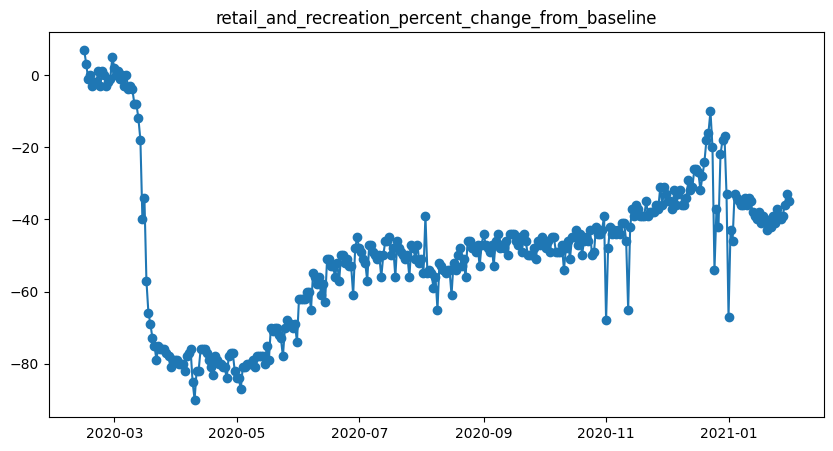

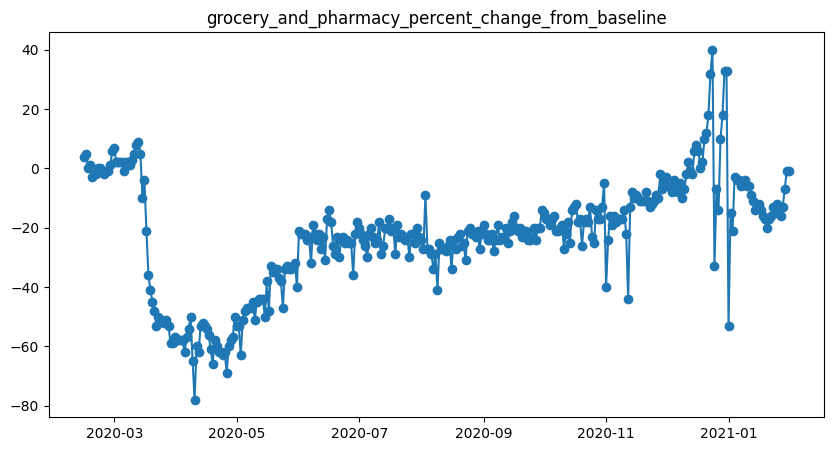

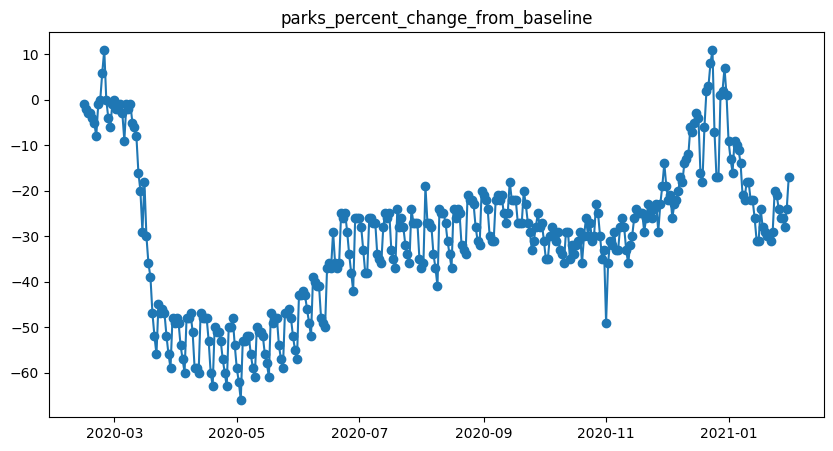

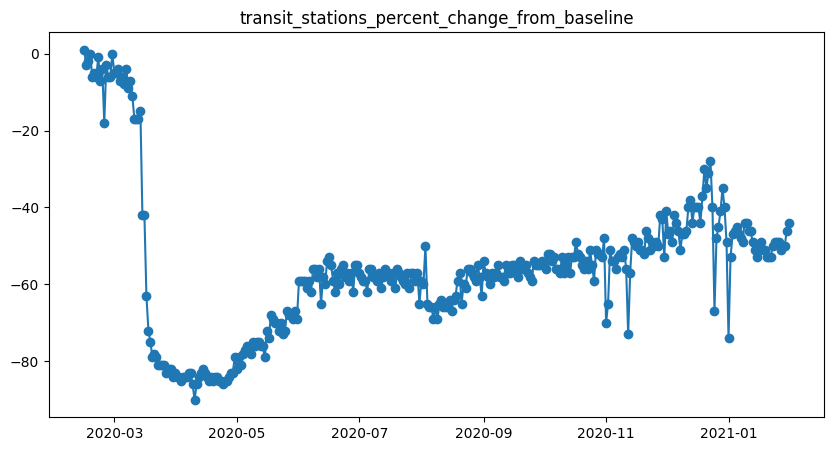

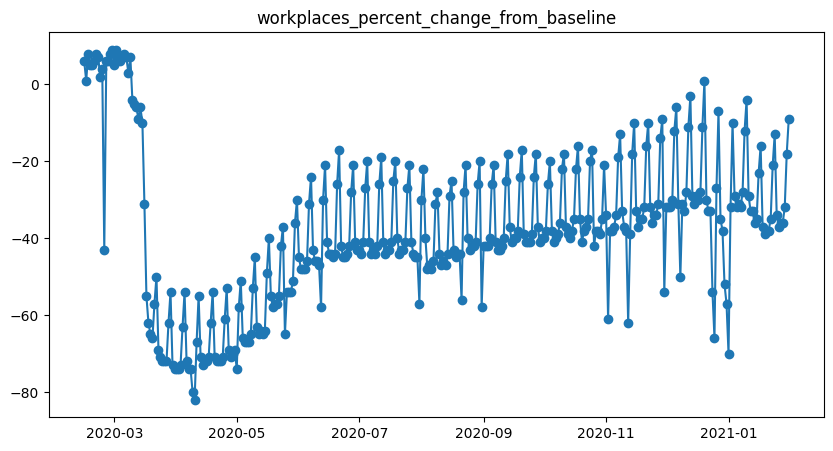

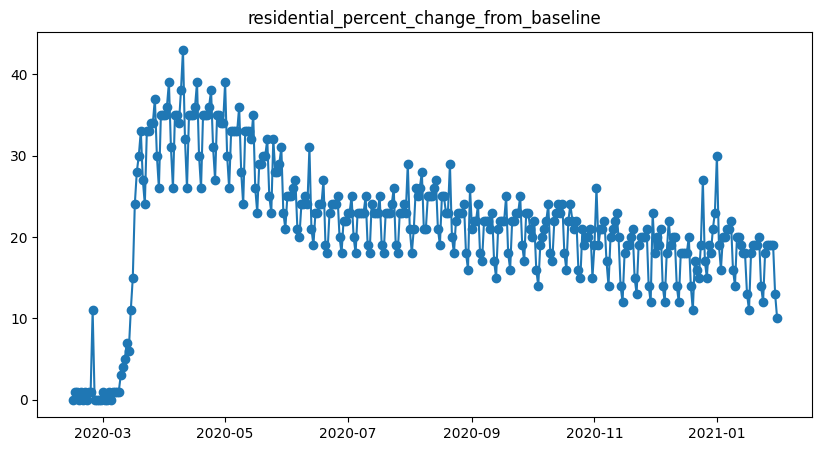

In [60]:
for num in numerical:
    plt.figure(figsize=(10, 5))
    plt.plot(philippines['date'], philippines[num], marker='o', linestyle='-')
    plt.title(num)

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(philippines['date'], philippines[num], marker='o', linestyle='-')
plt.title(num)